# Project - Data Science


         
        1 : Project on Machine Learning - Customer Segmentation and Transactional Analysis.
        
        2 : Project on Deep Learning    -
        
                                                 By : Farjad Ahmad Mir
                                                 
                                                      RIMT University
                                                      
                                                      Srinagar , Jammu and Kashmir 
                                                      
                                                      Date : 10-06-2020 

# Customer Segmentation 

Note :

1. I will be following The CRISP-DM Process Model (CRoss Industry Standard Process for Data Mining) for all of my projects.


2. The Detailed information of the project content, components and research will be available in the text document which will be provided along with the copy of this notebook.


3. For each process i will be providing relevent but brief information in the notebook itself but for more detailed theoritical aspect please check the text document of this notebook.


*** Before moving forward i would want the reader to understand two key terminologies and techniques that i will be using in this project to bring out the useful insights from the data.

1. Customer Segmentation : Customer segmentation is the problem of uncovering information about a companies or an organizations customer base which is based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns.


2. Market basket analysis: It is a method for gaining insights into granular behavior of customers. This is helpful in forming strategies which uncovers deeper understanding of purchase decisions taken by the customers. This becomes more  interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.


# Online Retail Transactions Dataset

* The online retail transactions dataset is available from the UCI Machine Learning Repository it is also available
  on kaggle
  

* It contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. It is also given that the company sells unique all-occasion gift items and a lot of customers of the organization are wholesalers.

# Loading Dependencies 

In [5]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab       # MLAB:A high-level python to MATLAB bridge that 
                                     # lets MATLAB look like normal python library
%matplotlib inline 

# Exploratory Data Analysis

* EDA is one of the first major analysis stages in the CRISP DM Process Model.
* The main objective is to explore and understand the data in detail.


# Loading and Viewing the Dataset

In [23]:
# Reading the Customer Transaction dataset with file format csv via pandas
df = pd.read_csv("data.csv", encoding='latin1')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

Size of the Dataset =>

In [24]:
df.shape

(541909, 8)

# Analysis of top most countries with most Shipments and Sales. 

In [47]:
# here we will try to view the 10 top couintries that the retailer is mostly doing business with and 

df.Country.value_counts().reset_index().head(n=10) 

index  Country
0  United Kingdom   495478
1         Germany     9495
2          France     8557
3            EIRE     8196
4           Spain     2533
5     Netherlands     2371
6         Belgium     2069
7     Switzerland     2002
8        Portugal     1519
9       Australia     1259

* From the above table, bulk of ordering is taking place in its home country.
* The Country named EIRE is Basically reffering to Ireland 

# Finding the number of Unique Customers 

In [30]:
df.CustomerID.unique().shape

(4373,)

# Percentage of orders made by top 10 customers:
 
 * We must keep in mind that the company also has wholesalers as customers. 
 
 * Mathematically        =========>
                                   |        DF of Unique no of customers      *  100 |
                                   |  --------------------------------------         |
                                   |    Revenue Generated by Uniqe customers         |

In [32]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(n=10).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
Name: CustomerID, dtype: float64

Clearly top 10 customers make about 8 % of total sales, lets find the number of customers that generate 10% of the total sales.


In [46]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(n=13).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

This shows that 10% of total sales are contributed by only 13 customers

# Data Quality Analysis

 * In this step we analyze the quality of data in our datasets, document potential errors, shortcomings, and issues that    need to be resolved before analyzing the data further or starting modeling efforts.
 
 
 

Number of unique items


In [48]:
df.StockCode.unique().shape

(4070,)

Total Number of Unique Product Descriptions 

In [50]:
df.Description.unique().shape

(4224,)

As from above we see that descriptions are more then the stock code so there are some stock codes which are having more than one Description

In [52]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [54]:
n_df = df.groupby(["StockCode","Description"]).count().reset_index()

StockCodes having more than one Description 

In [57]:
n_df.StockCode.value_counts()[n_df.StockCode.value_counts()>1].reset_index().head()

index  StockCode
0  20713          8
1  23084          7
2  85175          6
3  21830          6
4  21181          5

In [58]:
n_df.StockCode.value_counts()[n_df.StockCode.value_counts()>1].reset_index().shape

(650, 2)

This Implies that there are 650 Stock Codes with more than one Description.

Visualizing one of such Stock Codes

In [72]:
df[df['StockCode'] == n_df.StockCode.value_counts()[n_df.StockCode.value_counts()>1].
   reset_index()['index'][5]]['Description'].unique()

array(['SET/3 ROSE CANDLE IN JEWELLED BOX', 'wet pallet', 'damages',
       '???missing', 'AMAZON'], dtype=object)

As we can notice the Invoice Date Time in our dataset is an object, we need to convert it to a valid format before processing.

In [75]:
df['invdatetime'] = pd.to_datetime(df.InvoiceDate)

In [77]:
df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

      InvoiceDate  UnitPrice  CustomerID         Country         invdatetime  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom 2010-12-01 08:26:00  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom 2010-12-01 08:26:00

In [79]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID            float64
Country                object
invdatetime    datetime64[ns]
dtype: object

verify the sanctity of the Quantity and UnitPrice attributes, as those are the attributes we will be using in our analysis

In [80]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [82]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

* Both of these attributes are having negative values, which may mean that we may have some return transactions in our  data also.
* We need to handle these before we proceed to our analysis

# Data Cleaning

* Selecting the Data for A Particular Country - We will analyse for UK 

In [85]:
cln_df = df[df.Country == 'United Kingdom']

Calculating The Total Amount

In [91]:
cln_df['TotalAmount'] = df.Quantity*df.UnitPrice

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Removing Negative Transactions or Return Transactions.

In [93]:
cln_df = cln_df[~(cln_df.TotalAmount<0)]

In [94]:
cln_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country         invdatetime  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   

   TotalAmount  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4        20.34

Remove all the transactions that have a missing value for the CustomerID field as all our subsequent transactions will be based on the customer entities

In [96]:
cln_df = cln_df[~(cln_df.CustomerID.isnull())]

In [97]:
cln_df.shape

(354345, 10)

In [99]:
cln_df.describe()

Quantity      UnitPrice     CustomerID    TotalAmount
count  354345.000000  354345.000000  354345.000000  354345.000000
mean       12.048913       2.963793   15552.436219      20.625073
std       190.428127      17.862067    1594.546025     326.033014
min         1.000000       0.000000   12346.000000       0.000000
25%         2.000000       1.250000   14194.000000       4.160000
50%         4.000000       1.950000   15522.000000      10.200000
75%        12.000000       3.750000   16931.000000      17.700000
max     80995.000000    8142.750000   18287.000000  168469.600000

# RFM Model for Customer Value

* Build Recency Value Feature
* Build Frequency Value Feature
* Build Monetary Value Feature

For Detailed Explainantion go to the Text Document for this notebook.

# Building Recency Feature:

In [153]:
# To create the recency feature variable, we need to decide the reference date for our analysis

cln_df.invdatetime.max()

Timestamp('2011-12-09 12:49:00')

In [154]:
cln_df.invdatetime.min()

Timestamp('2010-12-01 08:26:00')

In [155]:
ref_date = cln_df.invdatetime.max()

In [156]:
ref_date = ref_date + datetime.timedelta(days=1)

In [157]:
ref_date

Timestamp('2011-12-10 12:49:00')

In [158]:
cln_df['days_since_last_purchase'] = ref_date - cln_df.invdatetime

In [159]:
cln_df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

      InvoiceDate  UnitPrice  CustomerID         Country         invdatetime  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom 2010-12-01 08:26:00   

   TotalAmount days_since_last_purchase  days_since_last_purchase_num  
0        15.30        374 days 04:23:00                         374.0  
1        20.34        374 days 04:23:00                         374.0  
2        22.00        374 days 04:23:00                         374.0

In [160]:
cln_df['days_since_last_purchase_num'] = cln_df['days_since_last_purchase'].astype('timedelta64[D]')

In [161]:
cln_df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

      InvoiceDate  UnitPrice  CustomerID         Country         invdatetime  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom 2010-12-01 08:26:00   

   TotalAmount days_since_last_purchase  days_since_last_purchase_num  
0        15.30        374 days 04:23:00                         374.0  
1        20.34        374 days 04:23:00                         374.0  
2        22.00        374 days 04:23:00                         374.0

Calculating Recency

In [162]:
cust_his_df = cln_df.groupby("CustomerID").min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
cust_his_df.head()

CustomerID  days_since_last_purchase_num
0     12346.0                         326.0
1     12747.0                           2.0
2     12748.0                           1.0
3     12749.0                           4.0
4     12820.0                           3.0

In [163]:
cust_his_df.rename(columns={'days_since_last_purchase_num':'recency'}, inplace=True)
cust_his_df.head()

CustomerID  recency
0     12346.0    326.0
1     12747.0      2.0
2     12748.0      1.0
3     12749.0      4.0
4     12820.0      3.0

In [164]:
cust_his_df.recency.describe()

count    3921.000000
mean       92.188472
std        99.528995
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: recency, dtype: float64

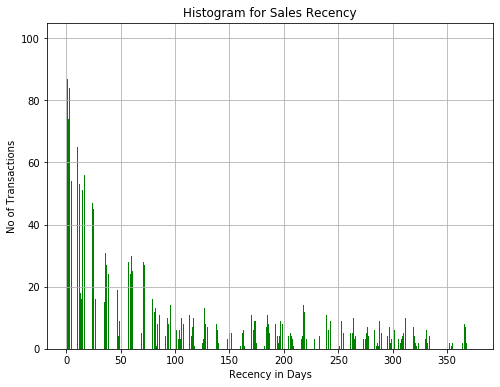

In [165]:
cust_his_df.hist(column='recency', bins = 1000,color = 'green', figsize = (8,6))
plt.xlabel("Recency in Days")
plt.ylabel("No of Transactions")
plt.title("Histogram for Sales Recency")
plt.show()

# Build Monetary value Features

In [166]:
cust_monet_val = cln_df[['CustomerID', 'TotalAmount']].groupby("CustomerID").sum().reset_index()


In [167]:
cust_monet_val.head()

CustomerID  TotalAmount
0     12346.0     77183.60
1     12747.0      4196.01
2     12748.0     33719.73
3     12749.0      4090.88
4     12820.0       942.34

In [168]:
cust_his_df = cust_his_df.merge(cust_monet_val, how='outer')
cust_his_df.head(3)

CustomerID  recency  TotalAmount
0     12346.0    326.0     77183.60
1     12747.0      2.0      4196.01
2     12748.0      1.0     33719.73

In [169]:
cust_his_df.TotalAmount = cust_his_df.TotalAmount+0.001
cust_his_df.head(3)

CustomerID  recency  TotalAmount
0     12346.0    326.0    77183.601
1     12747.0      2.0     4196.011
2     12748.0      1.0    33719.731

# Build Frequency Value feature

In [170]:
cust_freq = cln_df[['CustomerID', 'TotalAmount']].groupby("CustomerID").count().reset_index()
cust_freq.head(3)

CustomerID  TotalAmount
0     12346.0            1
1     12747.0          103
2     12748.0         4596

In [171]:
cust_freq.rename(columns={'TotalAmount':'frequency'},inplace=True)
cust_freq.head(3)

CustomerID  frequency
0     12346.0          1
1     12747.0        103
2     12748.0       4596

In [172]:
cust_his_df = cust_his_df.merge(cust_freq, how='outer')
cust_his_df.head(3)

CustomerID  recency  TotalAmount  frequency
0     12346.0    326.0    77183.601          1
1     12747.0      2.0     4196.011        103
2     12748.0      1.0    33719.731       4596

#  Data Pre-Processing

In [173]:
from sklearn import preprocessing
import math

Changing Variables to log scale 

In [174]:
cust_his_df['recency_log'] = cust_his_df['recency'].apply(math.log)
cust_his_df['frequency_log'] = cust_his_df['frequency'].apply(math.log)
cust_his_df['amount_log'] = cust_his_df['TotalAmount'].apply(math.log)

In [175]:
feature_vector = ['amount_log', 'recency_log','frequency_log']

In [177]:
X_subset = cust_his_df[feature_vector].to_numpy()

In [178]:
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

# Visualizing Recency vs Monetary Value (scaled)

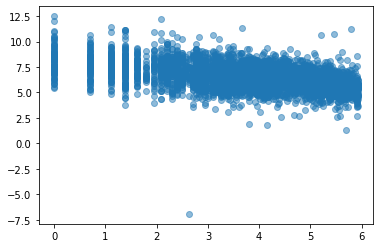

In [182]:
plt.scatter(cust_his_df.recency_log, cust_his_df.amount_log, alpha=0.5)

# Visualizing Monetary Value distribution (scaled)

Text(0.5, 1.0, 'Histogram of Log transformed Customer Monetary Value')

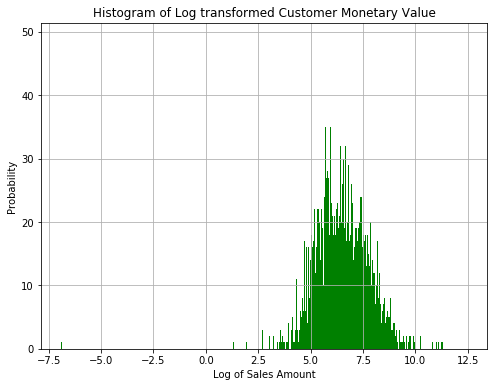

In [185]:
cust_his_df.hist(column='amount_log', bins = 1000, color='green', figsize=(8,6))
plt.xlabel("Log of Sales Amount")
plt.ylabel("Probability")
plt.title("Histogram of Log transformed Customer Monetary Value")

In [186]:
cust_his_df.head()

CustomerID  recency  TotalAmount  frequency  recency_log  frequency_log  \
0     12346.0    326.0    77183.601          1     5.786897       0.000000   
1     12747.0      2.0     4196.011        103     0.693147       4.634729   
2     12748.0      1.0    33719.731       4596     0.000000       8.432942   
3     12749.0      4.0     4090.881        199     1.386294       5.293305   
4     12820.0      3.0      942.341         59     1.098612       4.077537   

   amount_log  
0   11.253942  
1    8.341890  
2   10.425838  
3    8.316516  
4    6.848367

# Visualize our three main features (R, F, and M) on a 3-D plot

Text(0.5, 0, 'Monetary')

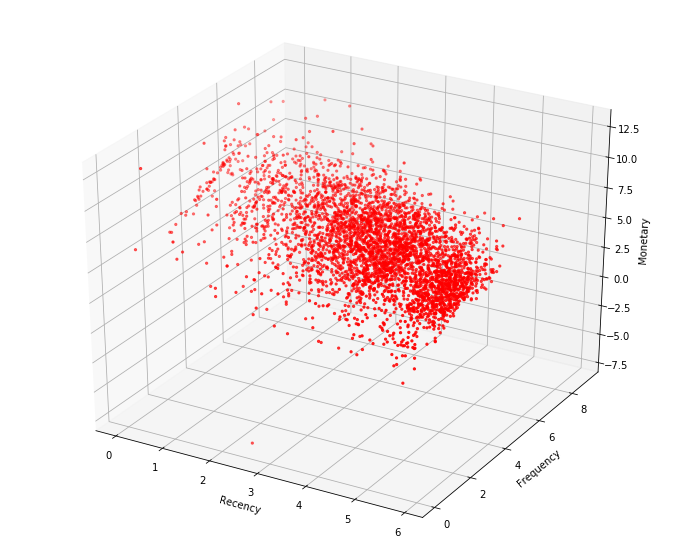

In [193]:


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

xs =cust_his_df.recency_log
ys = cust_his_df.frequency_log
zs = cust_his_df.amount_log
ax.scatter(xs, ys, zs, s=5, color = 'red', depthshade=True)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


# Clustering For Segments - K-Means Clustering 

# 2D - CLustering Visualization

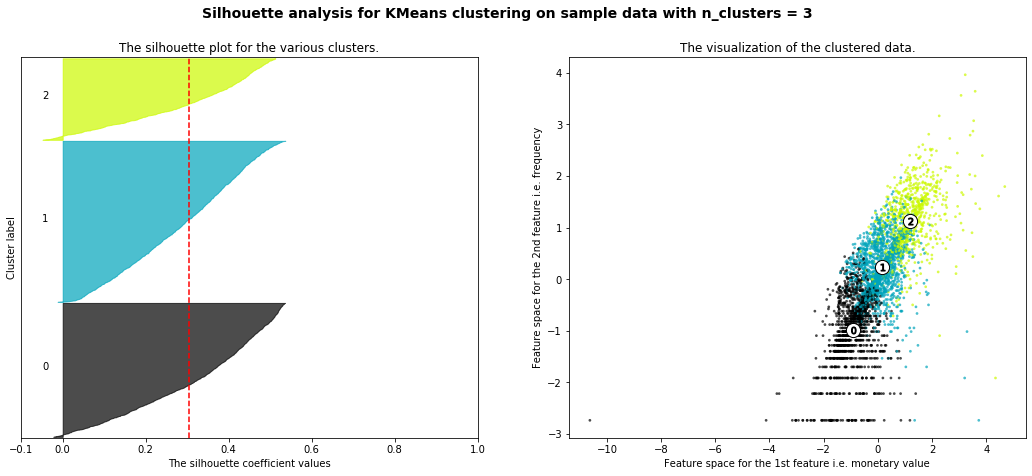

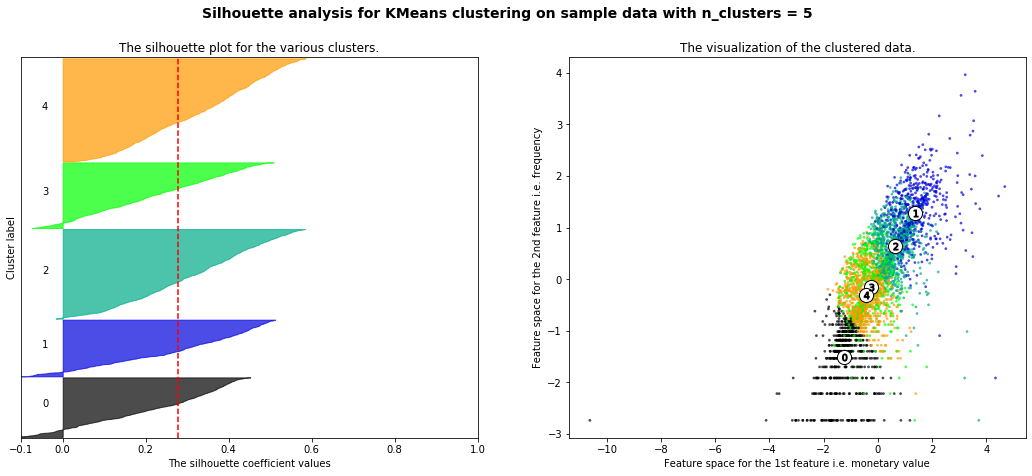

In [199]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()

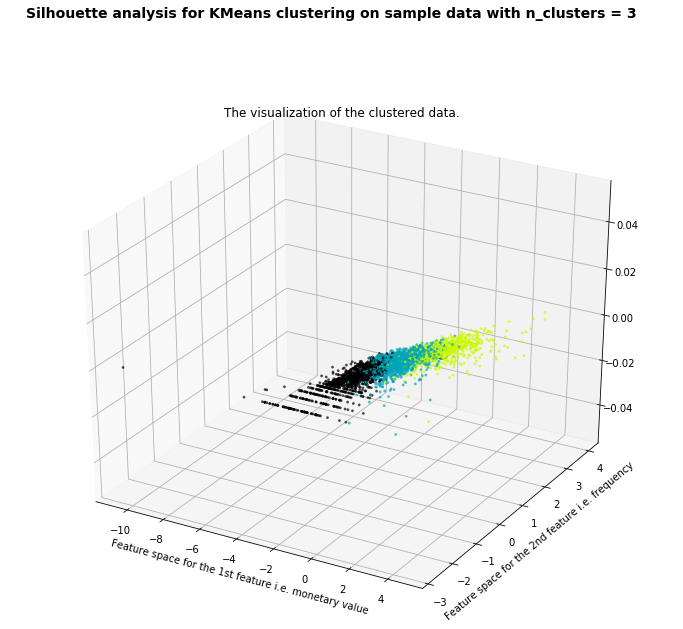

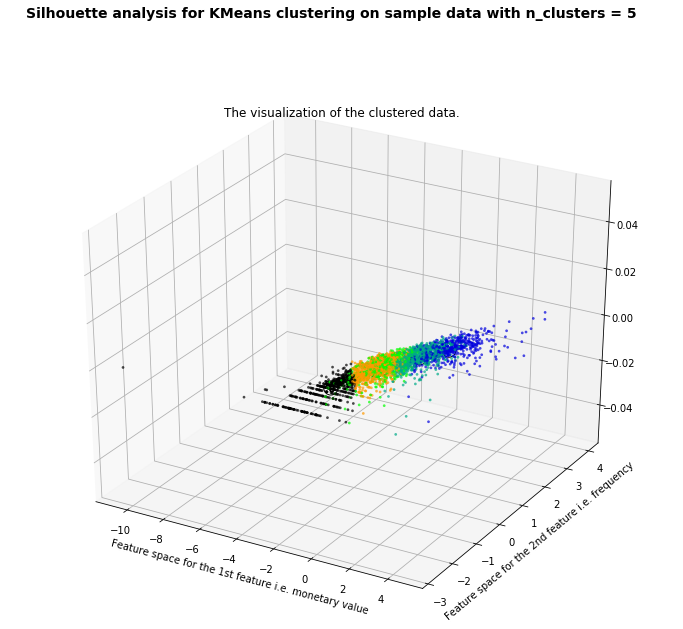

In [200]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(12, 10)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()

# Cluster Analysis

In [202]:
for i in range(3,6,2):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
    amount_log  recency_log  frequency_log
0   220.198311   122.258999      10.545038
1   828.741744    44.343353      53.275214
2  3158.748880     7.396805     177.087308
Silhouette score for cluster 3 is 0.303449108662755

for 5 number of clusters
    amount_log  recency_log  frequency_log
0   144.581761   121.494119       5.203414
1  3983.000207     5.669752     216.919083
2  1529.103414    48.475555      93.359920
3   491.225157    13.227883      31.937363
4   407.421058   138.857191      25.576757
Silhouette score for cluster 5 is 0.2782580724931221



# Cluster Descriptions

Assigning Cluster Labels 

In [205]:
labels = cluster_centers[5]['labels']   
cust_his_df['num_cluster5_labels'] = labels
labels = cluster_centers[3]['labels']
cust_his_df['num_cluster3_labels'] = labels

In [206]:
cust_his_df.head()

CustomerID  recency  TotalAmount  frequency  recency_log  frequency_log  \
0     12346.0    326.0    77183.601          1     5.786897       0.000000   
1     12747.0      2.0     4196.011        103     0.693147       4.634729   
2     12748.0      1.0    33719.731       4596     0.000000       8.432942   
3     12749.0      4.0     4090.881        199     1.386294       5.293305   
4     12820.0      3.0      942.341         59     1.098612       4.077537   

   amount_log  num_cluster5_labels  num_cluster3_labels  
0   11.253942                    2                    1  
1    8.341890                    1                    2  
2   10.425838                    1                    2  
3    8.316516                    1                    2  
4    6.848367                    3                    2

# Visualizing Segments 

In [209]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 100
field_to_plot = 'recency'

y0 = cust_his_df[cust_his_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = cust_his_df[cust_his_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = cust_his_df[cust_his_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = cust_his_df[cust_his_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = cust_his_df[cust_his_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)




In [212]:
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'TotalAmount'
y0 = cust_his_df[cust_his_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = cust_his_df[cust_his_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = cust_his_df[cust_his_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = cust_his_df[cust_his_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = cust_his_df[cust_his_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1000,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [214]:
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'frequency'
y0 = cust_his_df[cust_his_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = cust_his_df[cust_his_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = cust_his_df[cust_his_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = cust_his_df[cust_his_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = cust_his_df[cust_his_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=100,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [215]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 100
field_to_plot = 'recency'
y0 = cust_his_df[cust_his_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = cust_his_df[cust_his_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = cust_his_df[cust_his_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [216]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 80
field_to_plot = 'TotalAmount'
y0 = cust_his_df[cust_his_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = cust_his_df[cust_his_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = cust_his_df[cust_his_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(        
        dtick=1000,
    )
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

In [217]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 90
field_to_plot = 'frequency'
y0 = cust_his_df[cust_his_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = cust_his_df[cust_his_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = cust_his_df[cust_his_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=100,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

# End of Machine Learning Customer Segmentation Project.

* Reffer to the text Document for Detailed Procedural analysis step by step for this project.